In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from xgboost import XGBRFClassifier, XGBClassifier
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')

### Read Data

In [496]:
df = pd.read_csv('train.csv')
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [497]:
df.shape

(69999, 172)

In [498]:
print(df.dtypes[:60], df.dtypes[60:120], df.dtypes[120:])

id                        int64
circle_id                 int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6     object
last_date_of_month_7     object
last_date_of_month_8     object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
loc_og_t2t_mou_6        float64
loc_og_t2t_mou_7        float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_6        float64
loc_og_t2m_mou_7        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_6        float64
loc_og_t2f_mou_7        float64
loc_og_t

### Remove columns having more than 70% null values

In [499]:
columns_70 = []
for col in df.columns:
    print(col, '<--------->', df[col].isna().sum(),'<--------->', round((df[col].isna().sum()/69999)*100,2))
    if round((df[col].isna().sum()/69999)*100,2) < 70:
        columns_70.append(col)
df = df[columns_70]

id <---------> 0 <---------> 0.0
circle_id <---------> 0 <---------> 0.0
loc_og_t2o_mou <---------> 702 <---------> 1.0
std_og_t2o_mou <---------> 702 <---------> 1.0
loc_ic_t2o_mou <---------> 702 <---------> 1.0
last_date_of_month_6 <---------> 0 <---------> 0.0
last_date_of_month_7 <---------> 399 <---------> 0.57
last_date_of_month_8 <---------> 733 <---------> 1.05
arpu_6 <---------> 0 <---------> 0.0
arpu_7 <---------> 0 <---------> 0.0
arpu_8 <---------> 0 <---------> 0.0
onnet_mou_6 <---------> 2768 <---------> 3.95
onnet_mou_7 <---------> 2687 <---------> 3.84
onnet_mou_8 <---------> 3703 <---------> 5.29
offnet_mou_6 <---------> 2768 <---------> 3.95
offnet_mou_7 <---------> 2687 <---------> 3.84
offnet_mou_8 <---------> 3703 <---------> 5.29
roam_ic_mou_6 <---------> 2768 <---------> 3.95
roam_ic_mou_7 <---------> 2687 <---------> 3.84
roam_ic_mou_8 <---------> 3703 <---------> 5.29
roam_og_mou_6 <---------> 2768 <---------> 3.95
roam_og_mou_7 <---------> 2687 <---------> 3.

### Null Value Treatment

In [500]:
#Check columns with null values
for col in df.columns:
    if round((df[col].isna().sum()/69999)*100,2) > 0:
        print(col, '<--------->', df[col].isna().sum(),'<--------->', round((df[col].isna().sum()/69999)*100,2),'%')

loc_og_t2o_mou <---------> 702 <---------> 1.0 %
std_og_t2o_mou <---------> 702 <---------> 1.0 %
loc_ic_t2o_mou <---------> 702 <---------> 1.0 %
last_date_of_month_7 <---------> 399 <---------> 0.57 %
last_date_of_month_8 <---------> 733 <---------> 1.05 %
onnet_mou_6 <---------> 2768 <---------> 3.95 %
onnet_mou_7 <---------> 2687 <---------> 3.84 %
onnet_mou_8 <---------> 3703 <---------> 5.29 %
offnet_mou_6 <---------> 2768 <---------> 3.95 %
offnet_mou_7 <---------> 2687 <---------> 3.84 %
offnet_mou_8 <---------> 3703 <---------> 5.29 %
roam_ic_mou_6 <---------> 2768 <---------> 3.95 %
roam_ic_mou_7 <---------> 2687 <---------> 3.84 %
roam_ic_mou_8 <---------> 3703 <---------> 5.29 %
roam_og_mou_6 <---------> 2768 <---------> 3.95 %
roam_og_mou_7 <---------> 2687 <---------> 3.84 %
roam_og_mou_8 <---------> 3703 <---------> 5.29 %
loc_og_t2t_mou_6 <---------> 2768 <---------> 3.95 %
loc_og_t2t_mou_7 <---------> 2687 <---------> 3.84 %
loc_og_t2t_mou_8 <---------> 3703 <---------

In [501]:
# Delete Date columns
date_col = []
for col in df.columns:
    if 'date' in col:
        date_col.append(col)
df.drop(columns=date_col, inplace=True)

In [502]:
#Fill MOU and other outgoing, incoming call null values with 0
df.fillna(0, inplace=True)

In [503]:
df.isna().sum()

id                   0
circle_id            0
loc_og_t2o_mou       0
std_og_t2o_mou       0
loc_ic_t2o_mou       0
                    ..
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
churn_probability    0
Length: 136, dtype: int64

### Feature Engineering

In [504]:
#find all the month columns
month_col = []
distinct_features = []
for col in df.columns:
    if '6' in col or '7' in col or '8' in col:
        month_col.append(col)
        col = col.split('_')[:-1]
        col = '_'.join(col)
        distinct_features.append(col)
        
df[month_col]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,0,0,0,0,0,0,0,0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0,0,0,0,0,1,0,0,0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,0,0,0,0,0,0,0,0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0,7,6,6,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,...,0,0,6,1,0,0,0,0,1,0
69995,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,0.00,...,0,0,0,0,0,0,0,0,0,0
69996,372.088,258.374,279.782,77.13,68.44,78.44,335.54,227.94,263.84,0.00,...,0,0,0,0,0,0,0,0,0,0
69997,238.575,245.414,145.062,14.01,7.64,6.71,30.34,16.68,12.56,25.06,...,0,0,0,0,1,1,1,0,0,0


In [505]:
df.shape

(69999, 136)

In [506]:
# Find the avg and difference for all these columns
for feature in set(distinct_features):
    df[feature+'_avg'] = (df[feature+'_6'] + df[feature+'_7'])/2
    df[feature+'_diff'] = df[feature+'_avg'] - df[feature+'_8']
    df.drop(columns=[feature+'_6', feature+'_7', feature+'_8'], inplace=True)

In [507]:
df['vbc_3g_avg'] = df['jun_vbc_3g'] + df['jul_vbc_3g']
df['vbc_3g_avg'] = df['vbc_3g_avg']/2
df['vbc_3g_diff'] = df['vbc_3g_avg'] - df['aug_vbc_3g']
df.drop(columns=['aug_vbc_3g', 'jun_vbc_3g', 'jul_vbc_3g'], inplace=True)

In [508]:
df.iloc[:, 10:].head()

,std_og_t2m_mou_diff,monthly_2g_avg,monthly_2g_diff,std_og_t2f_mou_avg,std_og_t2f_mou_diff,std_og_mou_avg,std_og_mou_diff,std_ic_t2t_mou_avg,std_ic_t2t_mou_diff,loc_og_t2t_mou_avg,...,isd_og_mou_avg,isd_og_mou_diff,loc_og_t2c_mou_avg,loc_og_t2c_mou_diff,spl_og_mou_avg,spl_og_mou_diff,vol_3g_mb_avg,vol_3g_mb_diff,vbc_3g_avg,vbc_3g_diff
0,49.680,0.0,0.0,0.00,0.00,135.040,134.030,3.805,3.595,1.115,...,0.0,0.0,0.000,0.000,4.415,4.415,0.00,0.00,0.0,0.0
1,0.000,0.0,0.0,0.00,0.00,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,11.005,-18.785,15.365,-16.295,1.98,1.98,0.0,0.0
2,55.495,0.0,0.0,0.00,0.00,56.965,56.965,5.845,5.845,6.755,...,0.0,0.0,1.070,1.070,2.135,2.135,0.00,0.00,0.0,0.0
3,16.030,0.0,0.0,0.28,0.28,27.075,22.475,0.000,0.000,5.465,...,0.0,0.0,0.000,-8.030,12.040,-13.570,0.00,0.00,0.0,0.0
4,2.175,0.0,0.0,0.00,0.00,2.175,2.175,0.000,0.000,7.495,...,0.0,0.0,4.925,4.925,8.500,8.500,0.00,0.00,0.0,0.0


### EDA

#### Univariate

###### Delete the columns with 0 variance

id std: 20207.11508355411
circle_id std: 0.0
loc_og_t2o_mou std: 0.0
std_og_t2o_mou std: 0.0
loc_ic_t2o_mou std: 0.0
aon std: 952.426320924281
churn_probability std: 0.30250203588069513
ic_others_avg std: 11.301556921935047
ic_others_diff std: 10.024146705536193
std_og_t2m_mou_avg std: 238.6088275996017
std_og_t2m_mou_diff std: 201.99654437672493
monthly_2g_avg std: 0.2621876274561139
monthly_2g_diff std: 0.2581284632046329
std_og_t2f_mou_avg std: 7.326342508951085
std_og_t2f_mou_diff std: 5.527659733163842
std_og_mou_avg std: 366.09563372038804
std_og_mou_diff std: 292.20148999543983
std_ic_t2t_mou_avg std: 48.680804853974486
std_ic_t2t_mou_diff std: 43.33476994193299
loc_og_t2t_mou_avg std: 142.04177483079602
loc_og_t2t_mou_diff std: 92.33311513114951
roam_og_mou_avg std: 56.35508272649682
roam_og_mou_diff std: 57.86692160492969
sachet_2g_avg std: 1.4533745515850425
sachet_2g_diff std: 1.2213479279210273
loc_ic_t2f_mou_avg std: 38.47737410217876
loc_ic_t2f_mou_diff std: 24.6289092804

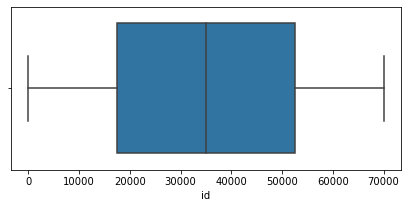

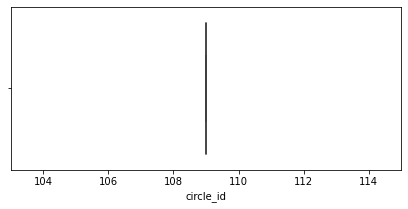

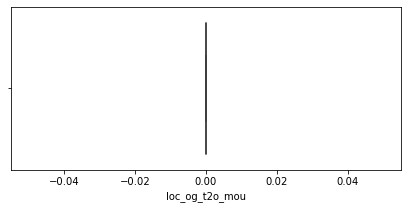

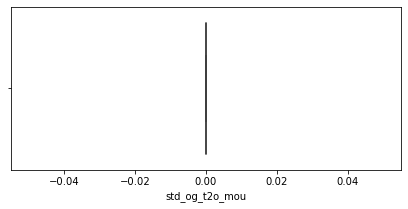

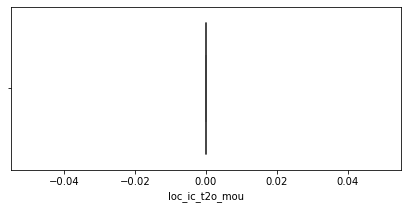

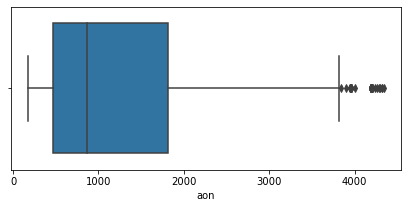

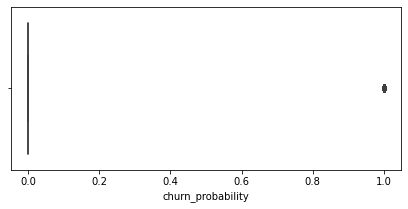

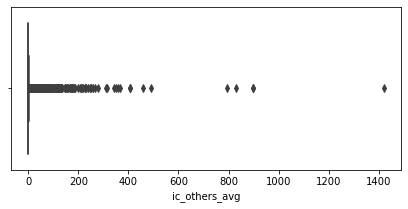

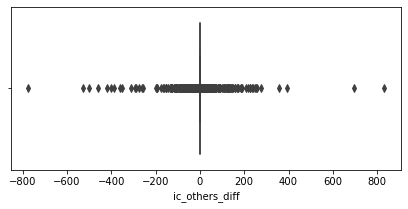

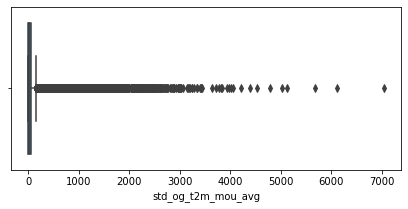

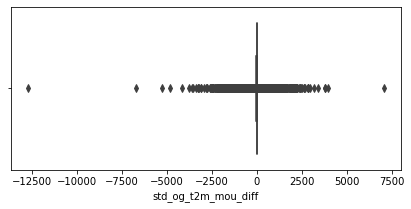

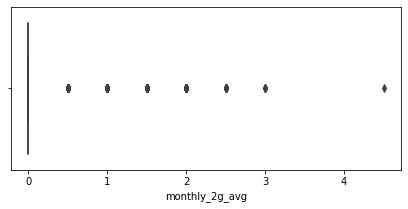

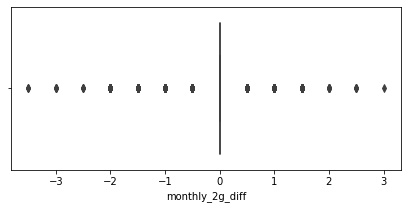

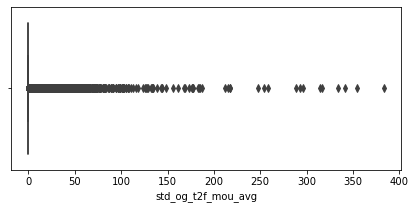

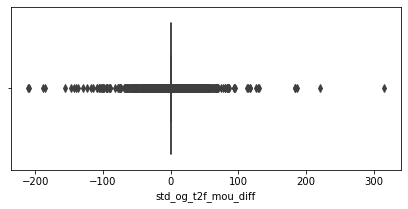

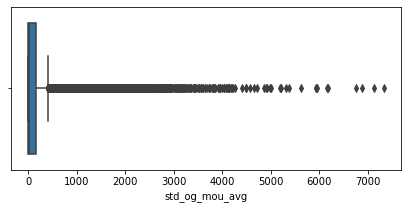

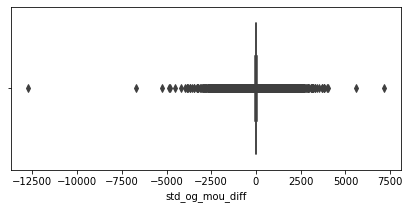

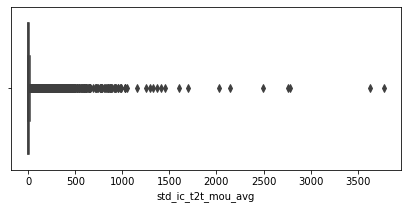

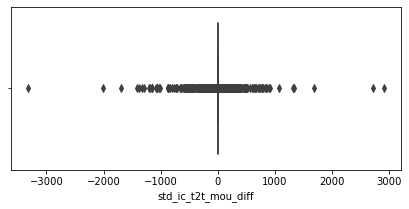

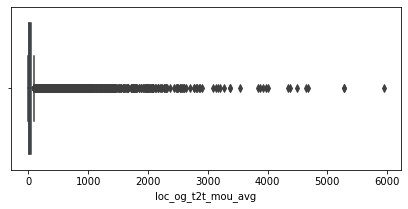

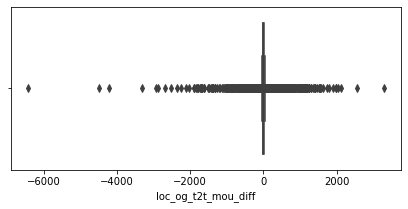

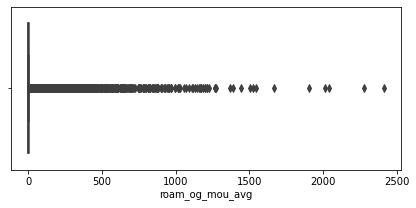

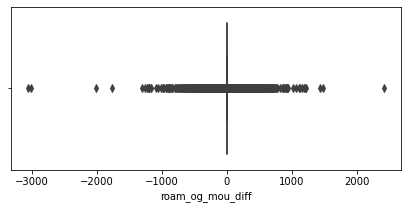

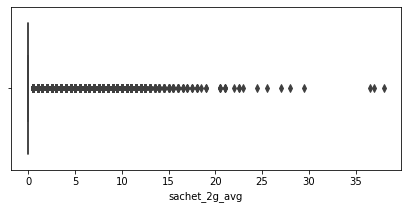

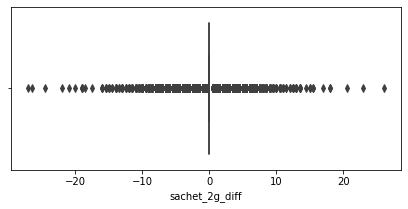

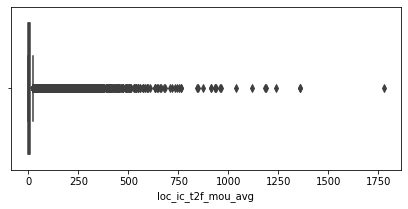

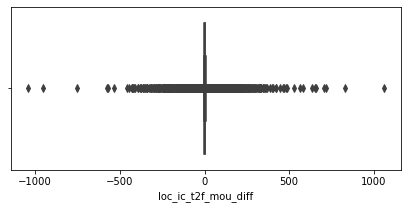

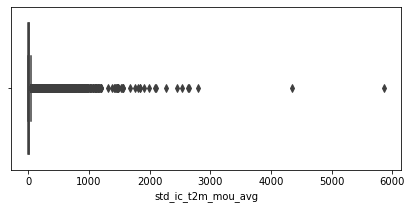

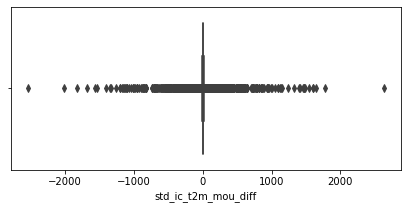

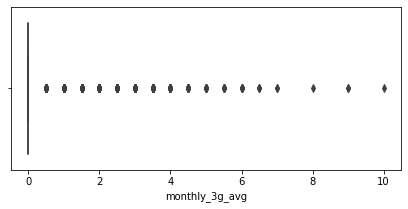

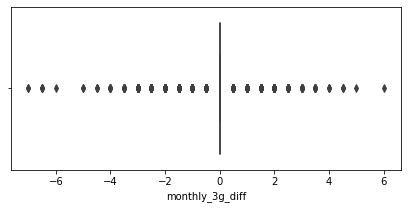

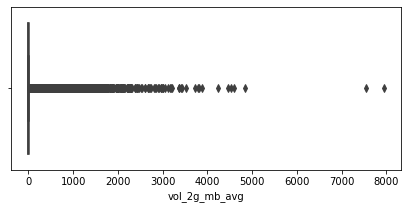

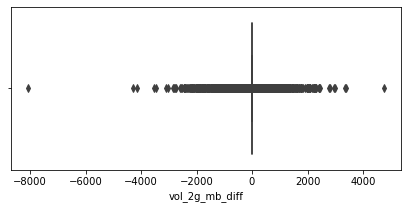

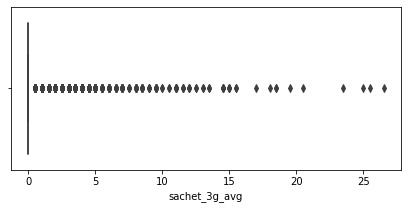

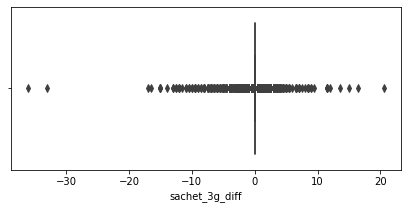

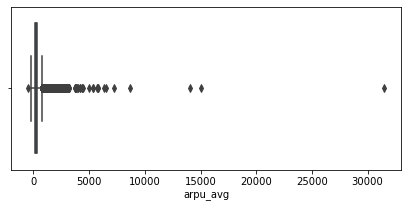

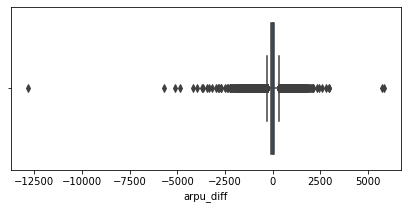

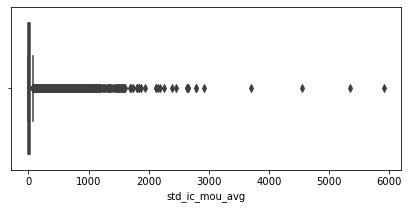

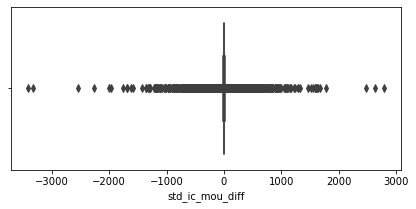

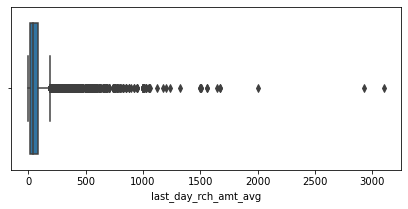

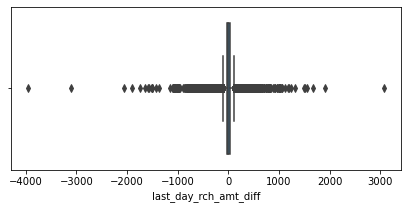

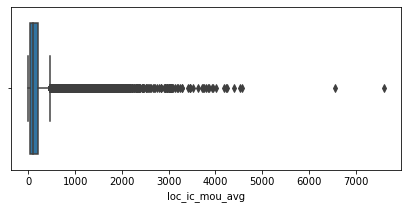

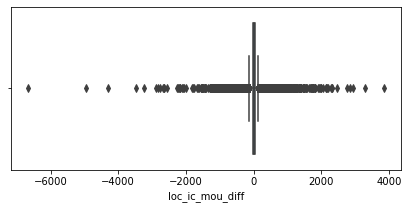

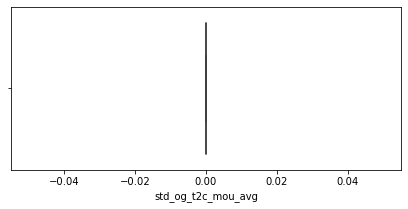

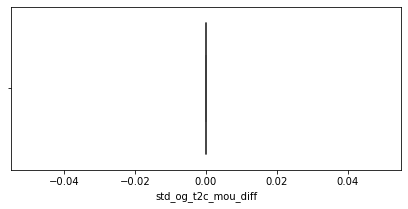

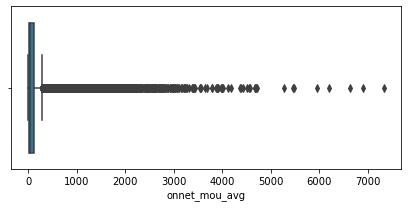

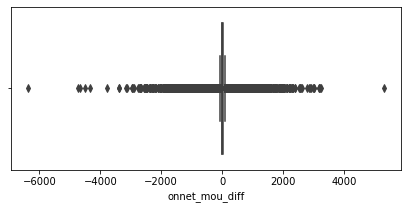

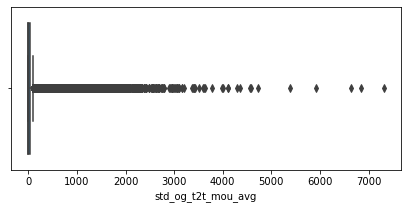

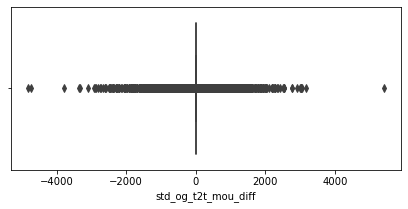

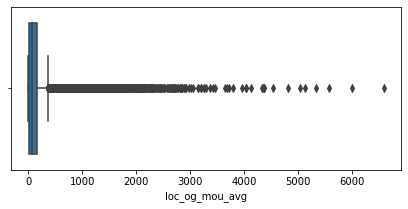

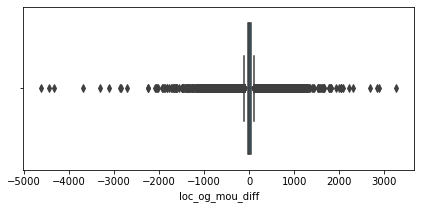

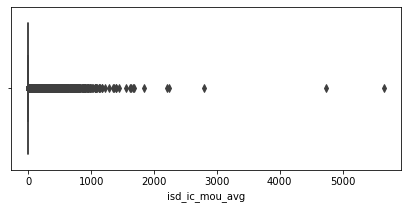

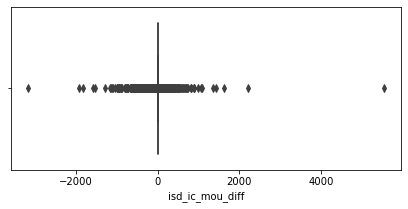

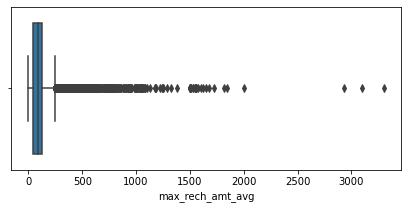

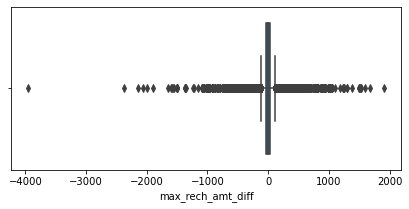

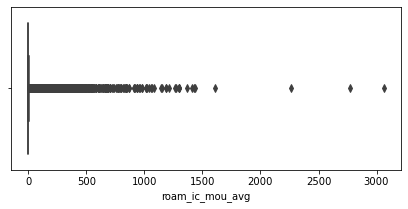

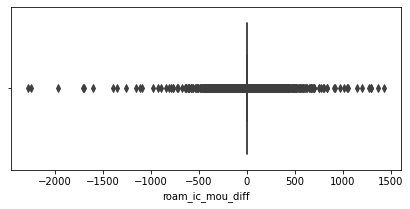

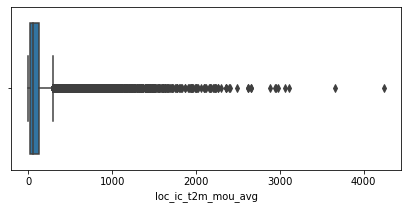

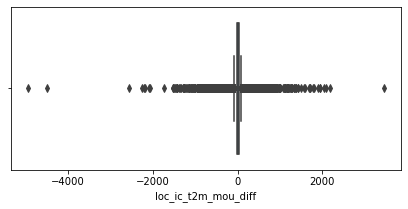

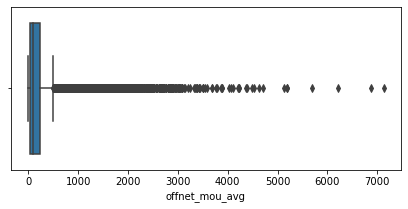

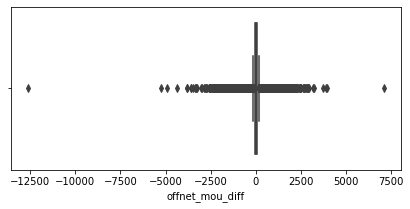

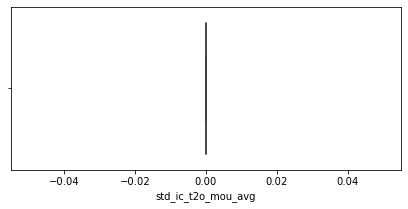

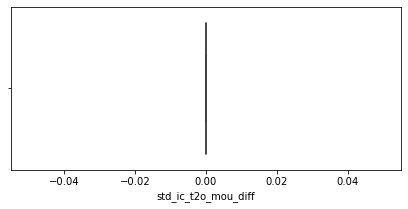

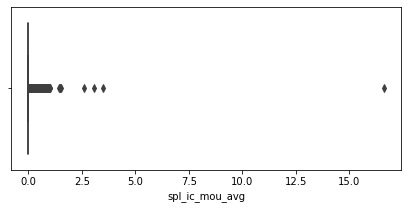

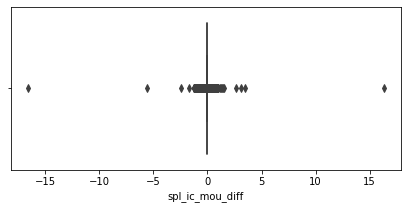

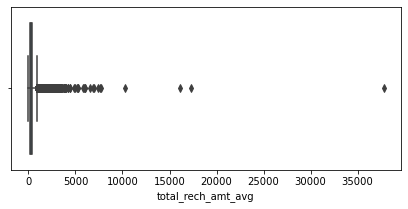

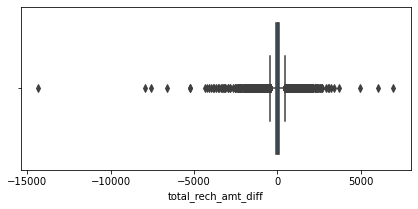

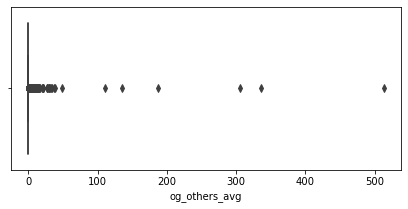

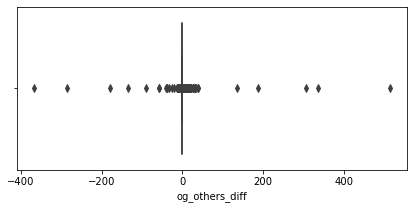

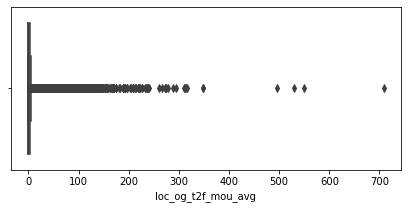

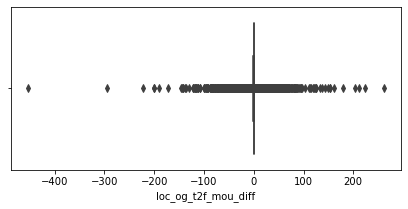

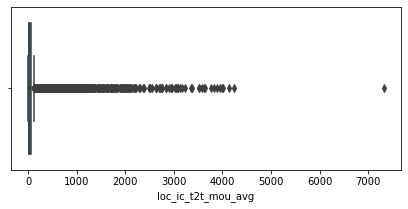

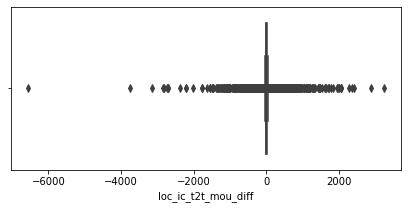

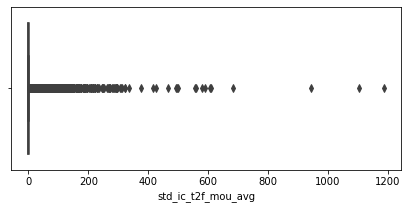

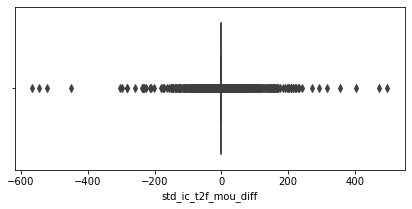

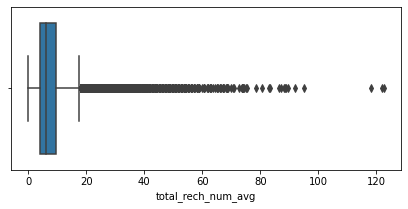

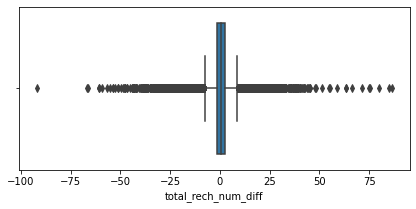

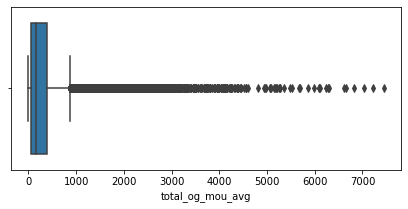

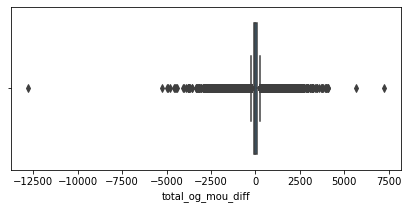

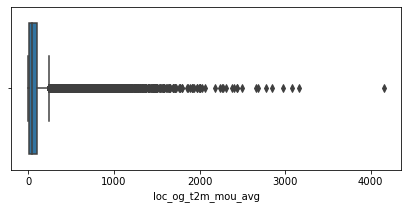

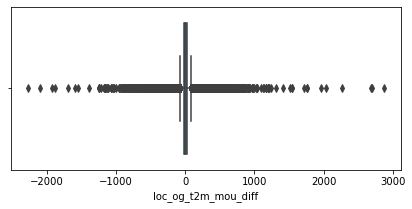

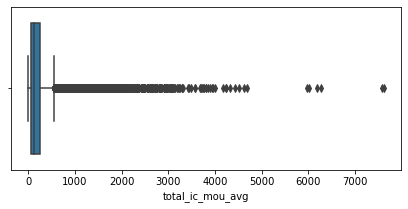

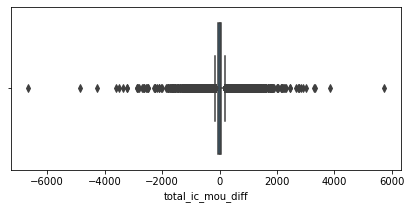

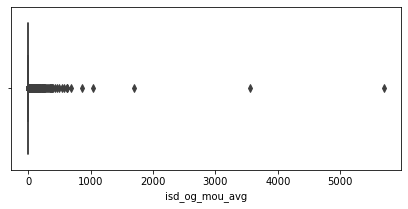

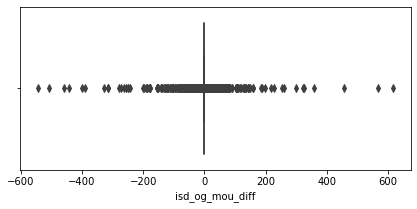

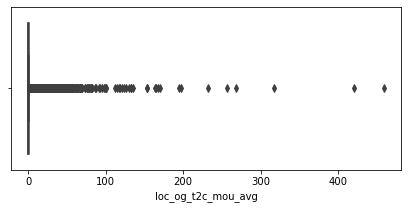

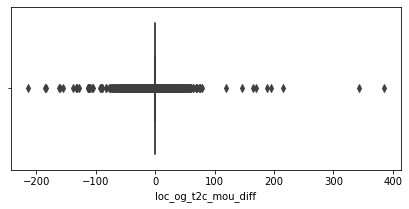

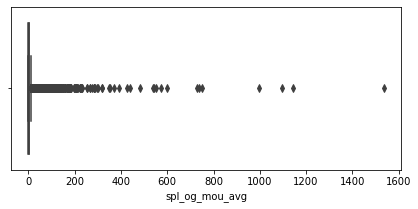

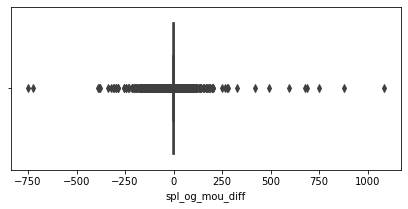

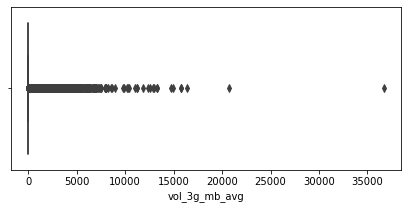

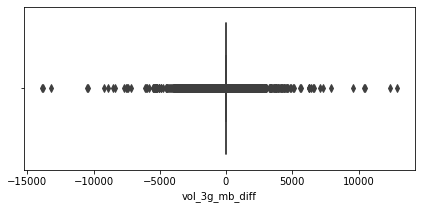

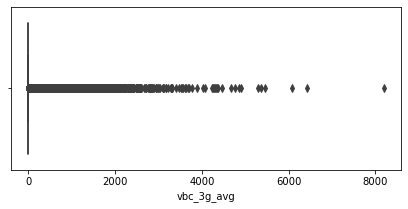

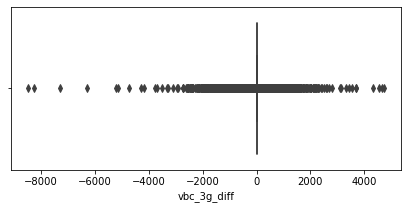

In [509]:
cols_with_std_0 = []
for col in df.columns:
    plt.figure(figsize=(7,3))
    sns.boxplot(x=col, data=df)
    print(col,'std:', df[col].std())
    if df[col].std() == 0:
        cols_with_std_0.append(col)
df.drop(columns=cols_with_std_0, inplace=True)

In [510]:
outlier_columns = ['aon', 'std_og_mou_avg', 'last_day_rch_amt_avg', 'onnet_mou_avg', 'loc_ic_mou_avg', 'loc_og_mou_avg', 'max_rech_amt_avg', 'loc_ic_t2m_mou_avg', 'loc_og_t2m_mou_avg', 'offnet_mou_avg', 'total_rech_num_avg', 'total_ic_mou_avg', 'total_og_mou_avg']
for col in outlier_columns:
    if col != 'churn_probability' and 'diff' not in col :
        iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
        uqr = df[col].quantile(0.75) + (iqr*1.5)
        lqr = df[col].quantile(0.25) - (iqr*1.5)
        df = df[(df[col] >=lqr) & (df[col] <= uqr)]
        print(col, '-->', df.shape)

aon --> (69938, 85)
std_og_mou_avg --> (60801, 85)
last_day_rch_amt_avg --> (57789, 85)
onnet_mou_avg --> (52222, 85)
loc_ic_mou_avg --> (48719, 85)
loc_og_mou_avg --> (45660, 85)
max_rech_amt_avg --> (44353, 85)
loc_ic_t2m_mou_avg --> (42280, 85)
loc_og_t2m_mou_avg --> (40267, 85)
offnet_mou_avg --> (37902, 85)
total_rech_num_avg --> (35991, 85)
total_ic_mou_avg --> (34670, 85)
total_og_mou_avg --> (34217, 85)


In [511]:
df.iloc[:, :15].describe()

,id,aon,churn_probability,ic_others_avg,ic_others_diff,std_og_t2m_mou_avg,std_og_t2m_mou_diff,monthly_2g_avg,monthly_2g_diff,std_og_t2f_mou_avg,std_og_t2f_mou_diff,std_og_mou_avg,std_og_mou_diff,std_ic_t2t_mou_avg,std_ic_t2t_mou_diff
count,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000
mean,35027.529737,1176.613818,0.115440,0.387471,-0.133245,17.186822,-16.525615,0.081918,-0.002309,0.611879,-0.034025,29.584077,-30.313219,3.800344,-1.175387
std,20218.185549,929.867076,0.319556,3.021190,5.835854,34.990843,113.095271,0.262677,0.262590,3.962881,4.028343,50.220545,166.273826,13.292255,21.889931
min,0.000000,180.000000,0.000000,0.000000,-528.355000,0.000000,-3765.605000,0.000000,-3.500000,0.000000,-188.570000,0.000000,-4546.220000,0.000000,-1692.030000
25%,17487.000000,451.000000,0.000000,0.000000,0.000000,0.000000,-2.135000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.695000,0.000000,0.000000
50%,35030.000000,828.000000,0.000000,0.000000,0.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,3.120000,0.000000,0.000000,0.000000
75%,52703.000000,1706.000000,0.000000,0.025000,0.000000,15.645000,2.090000,0.000000,0.000000,0.000000,0.000000,36.470000,3.955000,1.620000,0.180000
max,69998.000000,3821.000000,1.000000,182.540000,144.480000,227.295000,219.435000,4.500000,2.500000,184.780000,83.850000,271.865000,271.555000,260.260000,226.840000


### Bivariate Analysis

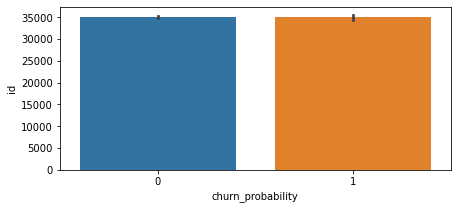

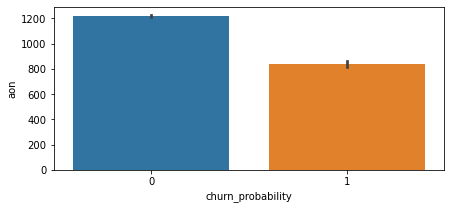

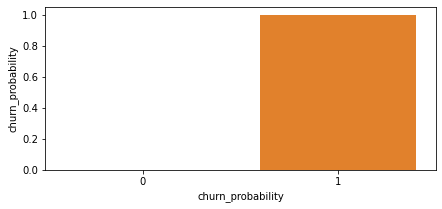

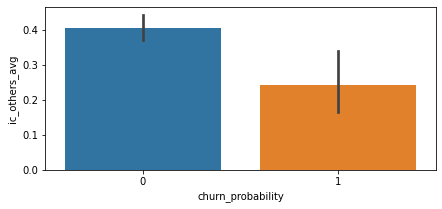

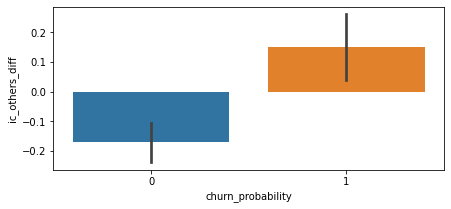

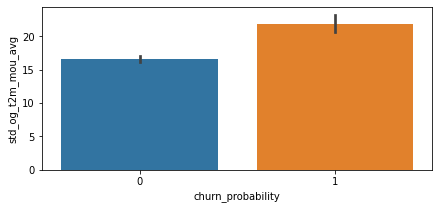

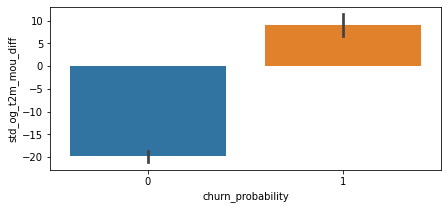

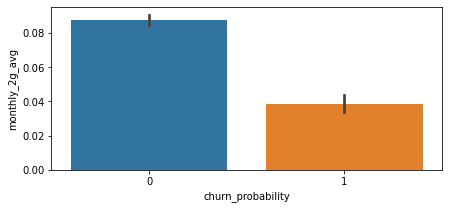

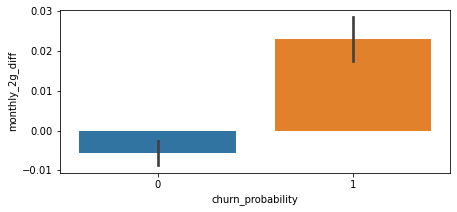

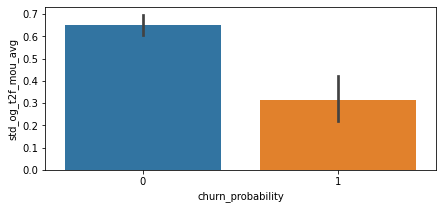

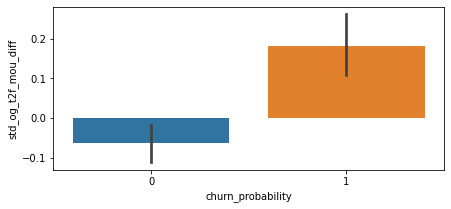

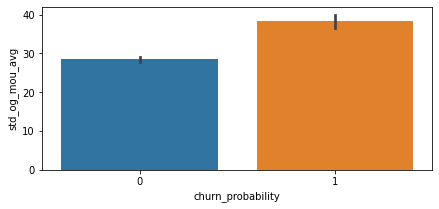

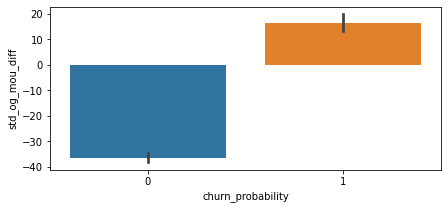

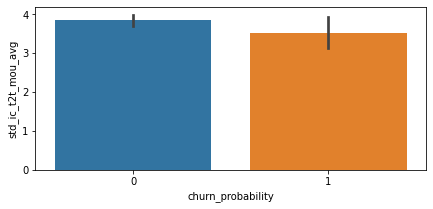

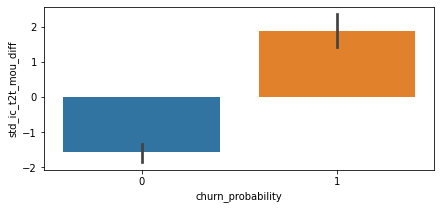

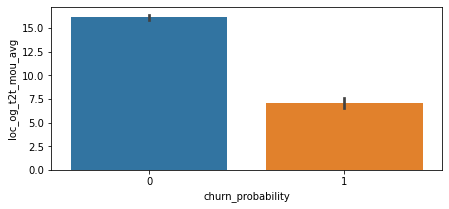

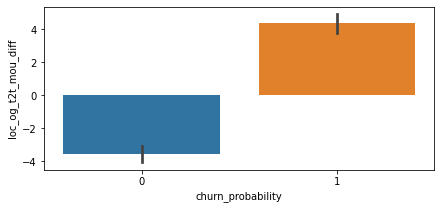

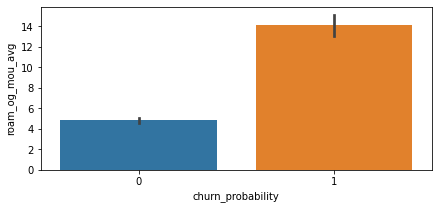

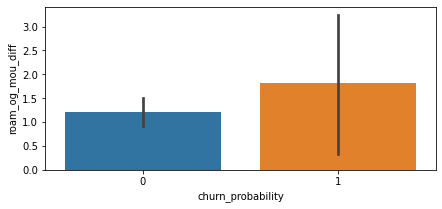

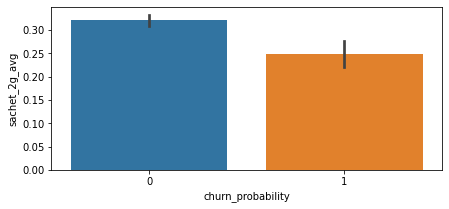

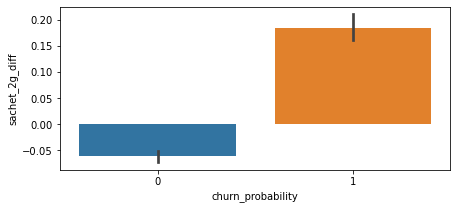

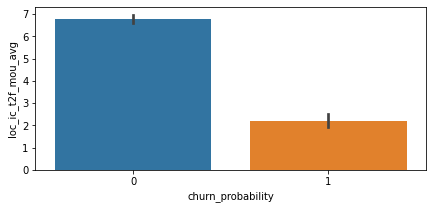

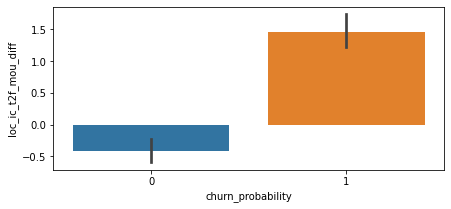

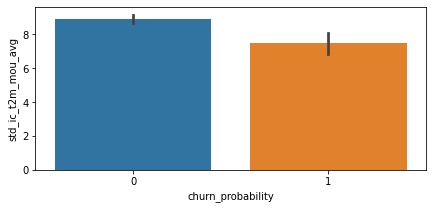

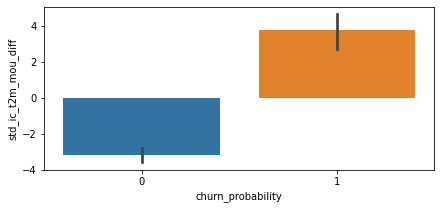

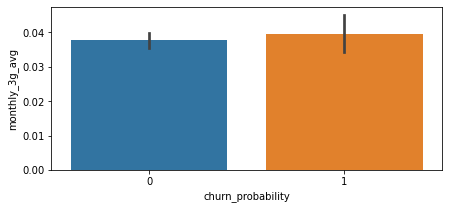

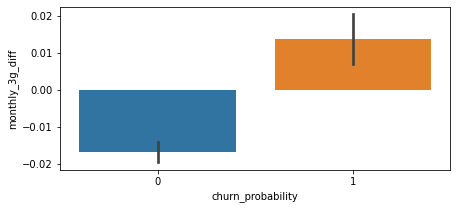

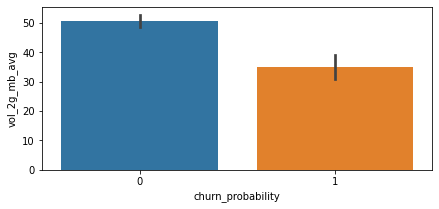

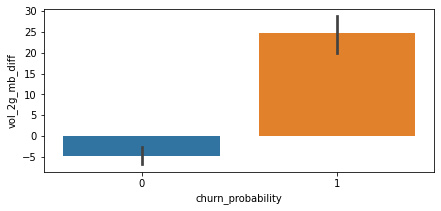

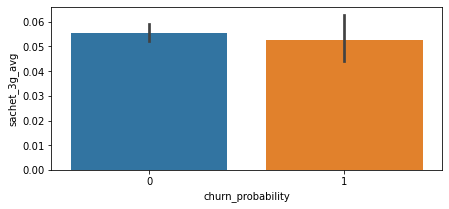

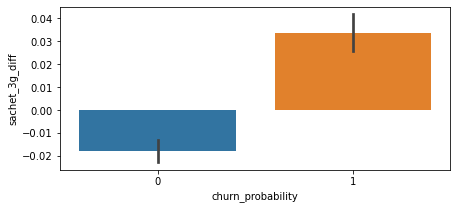

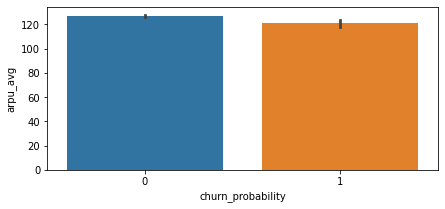

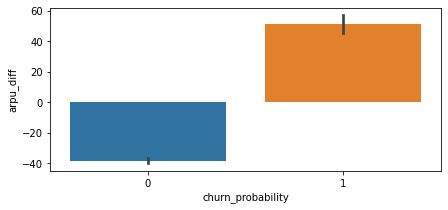

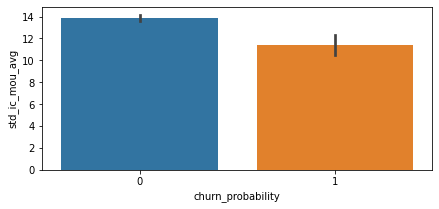

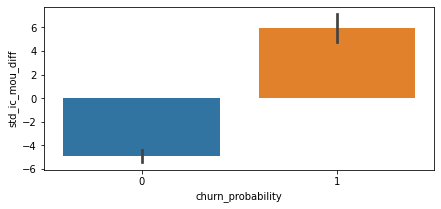

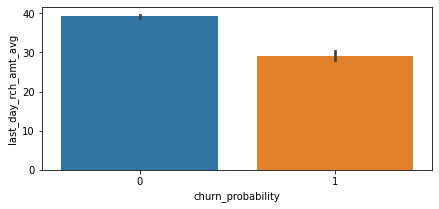

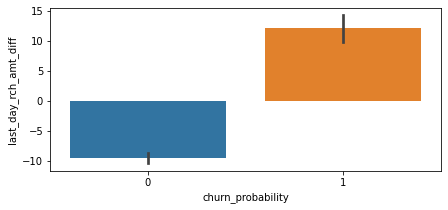

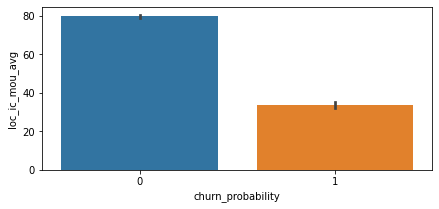

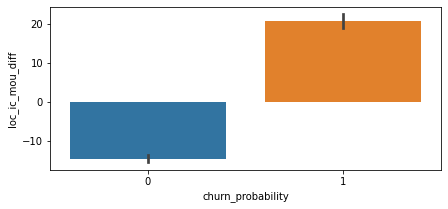

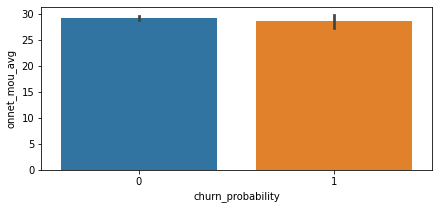

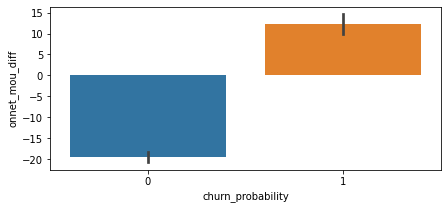

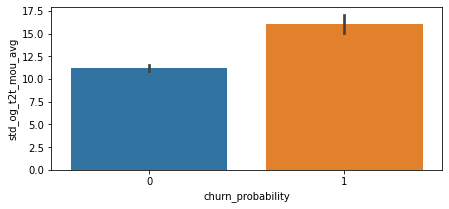

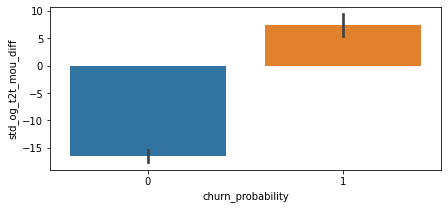

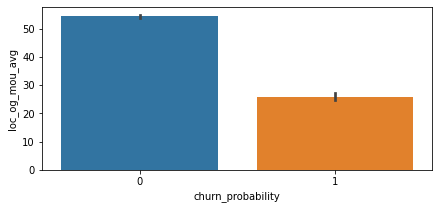

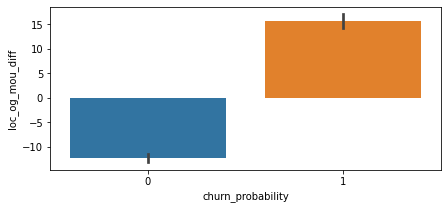

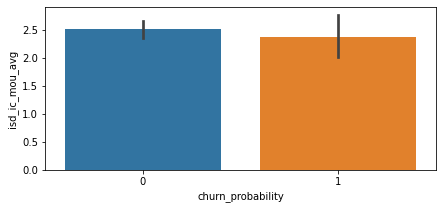

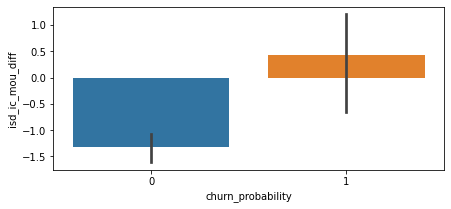

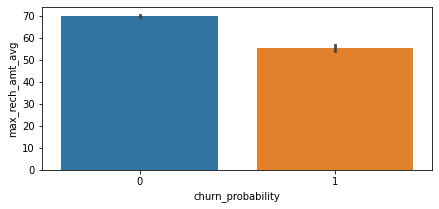

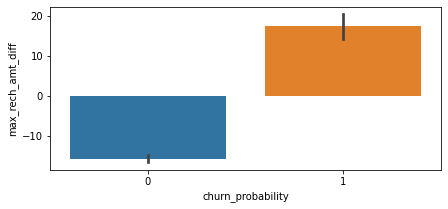

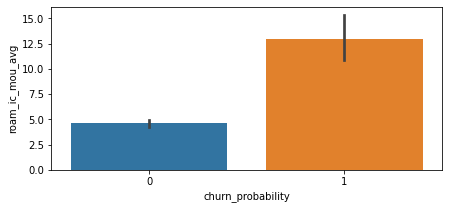

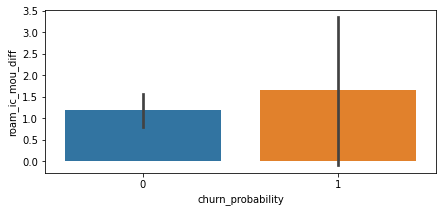

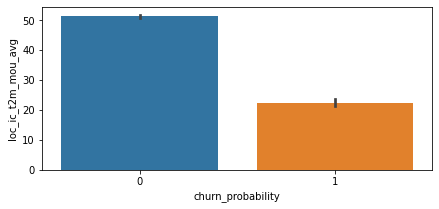

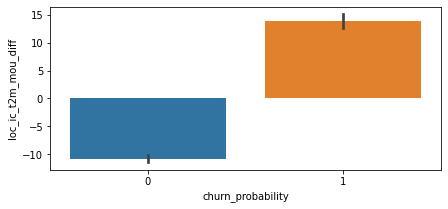

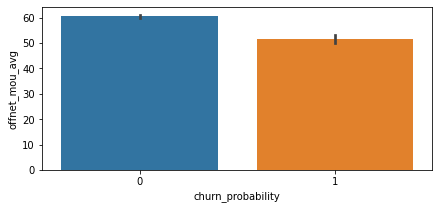

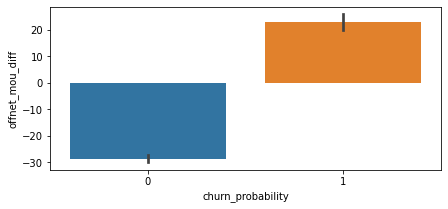

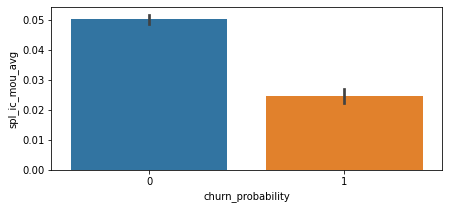

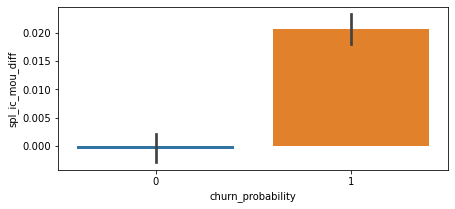

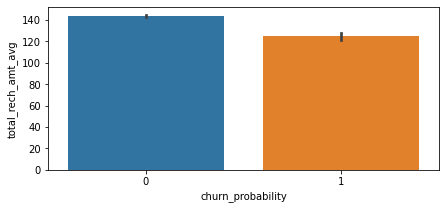

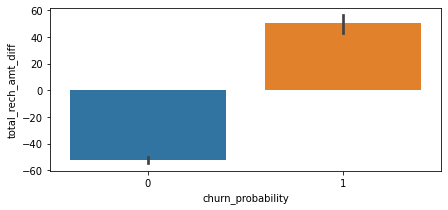

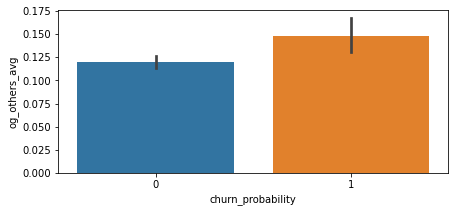

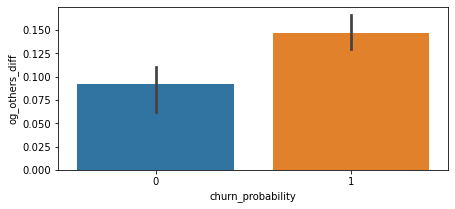

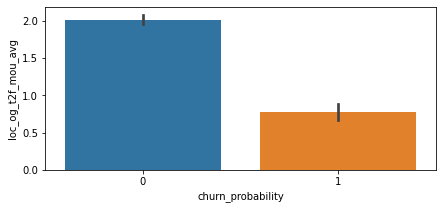

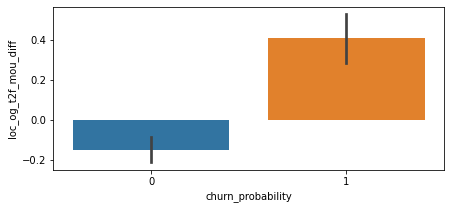

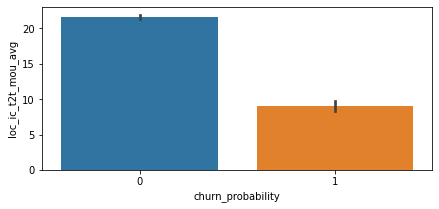

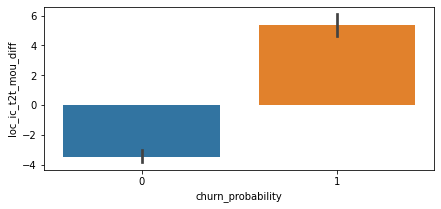

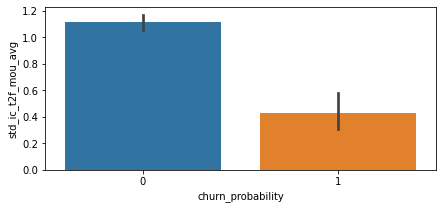

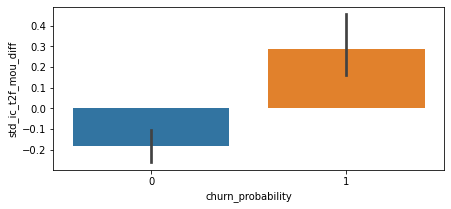

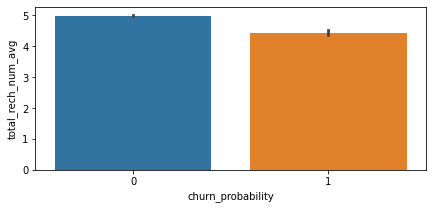

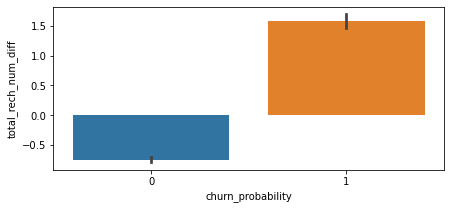

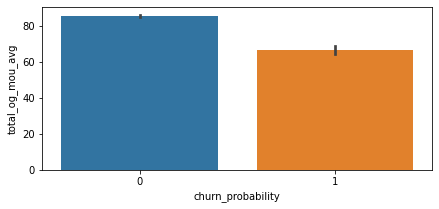

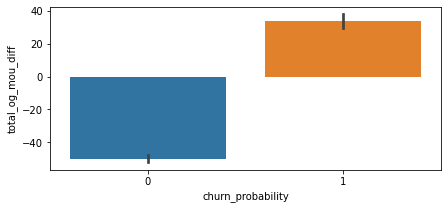

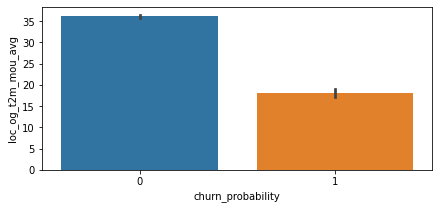

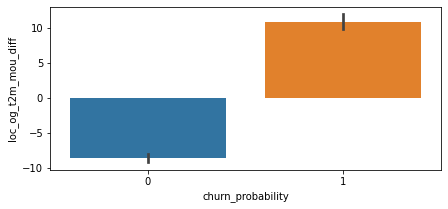

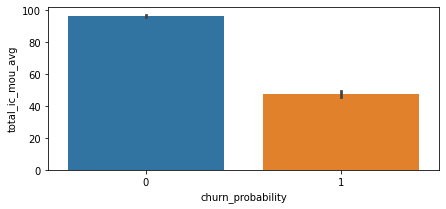

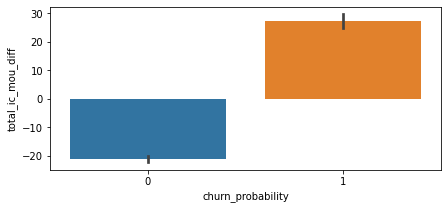

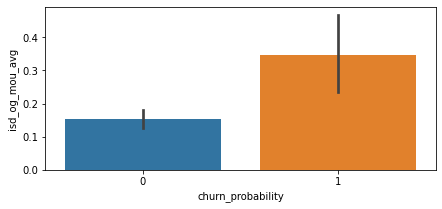

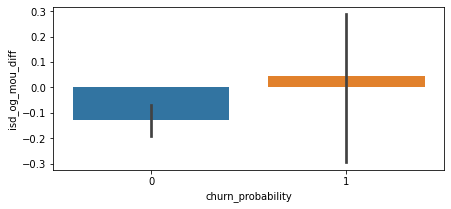

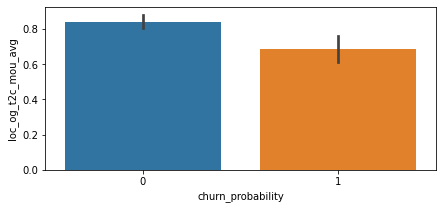

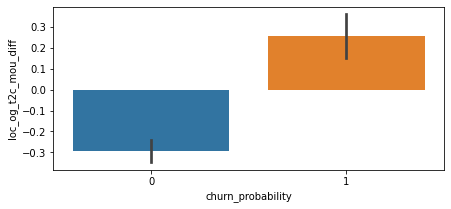

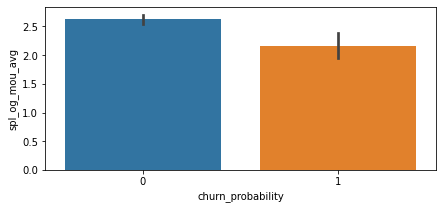

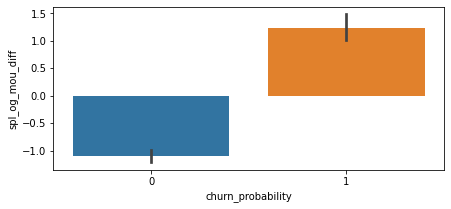

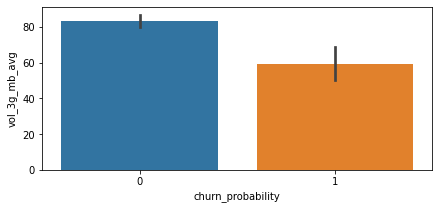

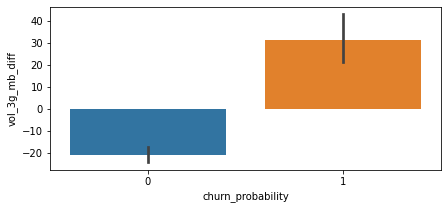

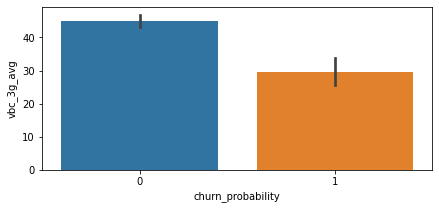

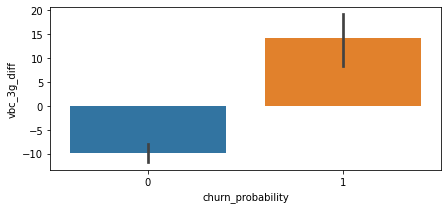

In [512]:
for col in df.columns:
    plt.figure(figsize=(7,3))
    sns.barplot(x='churn_probability',y=col, data=df)

#### From Above chart we understood
1. Newer customers are very likely churn compared to older customers. Newer customer's average age around 800days
2. We can see non churn customer usaage are high compared churn.
3. Difference between avg usage and last month usage is high for churned customers

### Handling Imbalance Data

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

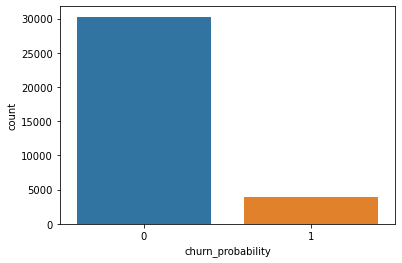

In [513]:
sns.countplot(x='churn_probability', data=df)

In [514]:
df['churn_probability'].value_counts()

0    30267
1     3950
Name: churn_probability, dtype: int64

In [515]:
new_df = df.copy()

In [516]:
y = new_df.loc[:, ['churn_probability']]
new_df.drop(columns=['churn_probability'], inplace=True)

In [517]:
smote = SMOTE(random_state = 2)
new_df, y = smote.fit_resample(new_df, y)

In [518]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, random_state=42, test_size=0.2)

### Feature Importance

#### Logistic Regression Feature Importance

In [519]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48427
Model:                            GLM   Df Residuals:                    48342
Model Family:                Binomial   Df Model:                           84
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16243.
Date:                Mon, 12 Dec 2022   Deviance:                       32487.
Time:                        00:40:51   Pearson chi2:                 5.17e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5110
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.2687      0.058     56.249      0.000       3.155       3.383
id                     1.901e-07   7.06e-07      0.269      0.788   -1.19e-06    1.57e-06
aon                      -0.0003    1.9e-05    -13.429      0.000      -0.000      -0.000
ic_others_avg            92.1659      5.111     18.033      0.000      82.149     102.183
ic_others_diff          -83.0132      3.471    -23.917      0.000     -89.816     -76.210
std_og_t2m_mou_avg      -15.8681      8.137     -1.950      0.051     -31.815       0.079
std_og_t2m_mou_diff      -0.5860      5.314     -0.110      0.912     -11.001       9.829
monthly_2g_avg           -1.6647      0.133    -12.493      0.000      -1.926      -1.404
monthly_2g_diff           0.9260      0.105      8.812      0.000       0.720       1.132
std_og_t2f_mou_avg      -15.8680      8.137     -1.950      0.051     -31.817       0.081
std_og_t2f_mou_diff      -0.5781      5.314     -0.109      0.913     -10.994       9.837
std_og_mou_avg           34.2598      9.803      3.495      0.000      15.047      53.473
std_og_mou_diff         -19.3993      6.329     -3.065      0.002     -31.804      -6.995
std_ic_t2t_mou_avg       -9.8861      8.349     -1.184      0.236     -26.250       6.477
std_ic_t2t_mou_diff     -29.8125      5.723     -5.209      0.000     -41.030     -18.595
loc_og_t2t_mou_avg      101.4546      5.303     19.133      0.000      91.062     111.848
loc_og_t2t_mou_diff     -53.9615      3.601    -14.986      0.000     -61.019     -46.904
roam_og_mou_avg           0.0199      0.008      2.492      0.013       0.004       0.036
roam_og_mou_diff         -0.0165      0.004     -3.733      0.000      -0.025      -0.008
sachet_2g_avg            -0.3751      0.029    -12.970      0.000      -0.432      -0.318
sachet_2g_diff            0.3444      0.032     10.922      0.000       0.283       0.406
loc_ic_t2f_mou_avg      142.1841      4.745     29.964      0.000     132.884     151.485
loc_ic_t2f_mou_diff     -81.2158      3.253    -24.969      0.000     -87.591     -74.841
std_ic_t2m_mou_avg       -9.8855      8.349     -1.184      0.236     -26.249       6.478
std_ic_t2m_mou_diff     -29.8141      5.723     -5.209      0.000     -41.031     -18.597
monthly_3g_avg           -0.5399      0.125     -4.311      0.000      -0.785      -0.294
monthly_3g_diff           0.3685      0.104      3.558      0.000       0.166       0.571
vol_2g_mb_avg            -0.0009      0.000     -5.065      0.000      -0.001      -0.001
vol_2g_mb_diff            0.0011      0.000      6.295      0.000       0.001       0.001
sachet_3g_avg            -0.3161      0.061     -5.147      0.000      -0.436      -0.196
sachet_3g_diff            0.3410      0.069      4.962      0.000       0.206       0.476
arpu_avg               

In [553]:
y_pred = res.predict(sm.add_constant(X_test)).values.reshape(-1)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]

In [554]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8661105145783431
ROC AUC: 0.8658082695684075
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      5952
           1       0.86      0.88      0.87      6155

    accuracy                           0.87     12107
   macro avg       0.87      0.87      0.87     12107
weighted avg       0.87      0.87      0.87     12107



#### XGB Classifier

In [522]:
xgbm = XGBClassifier()
xgbm_model = xgbm.fit(X_train, y_train)

In [523]:
fi = pd.DataFrame({
    'features':list(new_df.columns),
    'importance':list(xgbm_model.feature_importances_)}
)
fi.sort_values(ascending=False, by='importance')

,features,importance
31,arpu_diff,0.099399
36,loc_ic_mou_avg,0.065028
17,roam_og_mou_diff,0.056428
37,loc_ic_mou_diff,0.053186
73,total_ic_mou_diff,0.048376
...,...,...
52,offnet_mou_avg,0.002102
60,loc_og_t2f_mou_avg,0.002004
70,loc_og_t2m_mou_avg,0.001964
8,std_og_t2f_mou_avg,0.001899


In [524]:
y_pred = xgbm_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9536631700669035
ROC AUC: 0.9536404422490674
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5952
           1       0.95      0.95      0.95      6155

    accuracy                           0.95     12107
   macro avg       0.95      0.95      0.95     12107
weighted avg       0.95      0.95      0.95     12107



In [525]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Apply PCA

In [526]:
pca = PCA(random_state=42)
pca.fit(X_train_scaled)

PCA(random_state=42)

In [527]:
pca.components_

array([[-1.88844247e-03, -2.69152893e-02, -1.27561199e-02, ...,
        -4.56354033e-02, -2.74735613e-02, -3.82471792e-02],
       [-8.78690902e-07,  1.17448579e-01,  2.45812125e-02, ...,
        -3.29584298e-02,  3.49963478e-02, -2.48107100e-02],
       [ 5.04109025e-03,  5.34226280e-02, -2.34183912e-03, ...,
         1.43465326e-01,  2.58315601e-01,  1.20232460e-01],
       ...,
       [-1.33780715e-07, -1.27438895e-06,  1.54459925e-02, ...,
        -1.18106007e-07, -5.91943412e-07,  3.15856754e-07],
       [ 3.70877385e-08,  8.24252215e-07,  7.91514031e-03, ...,
         8.72679908e-08,  3.86874448e-07, -1.85698902e-07],
       [-7.44787165e-08, -1.97924991e-07, -9.62576288e-05, ...,
         8.95464001e-08,  1.76513129e-07, -2.47855860e-07]])

In [528]:
sorted(pca.explained_variance_ratio_)

[1.7486959391530204e-12,
 5.400148319051291e-12,
 7.135719029139641e-12,
 1.1105140418329907e-11,
 1.4728290528177745e-11,
 2.179988678223284e-11,
 2.4829371786208982e-11,
 2.7852503646267085e-11,
 4.334136907857439e-11,
 6.08102493325704e-11,
 7.24965046567795e-11,
 1.08456704654276e-10,
 3.901479575237617e-06,
 9.518874593876717e-06,
 8.60060440956062e-05,
 0.00031349626181126204,
 0.00038211215304143016,
 0.0012784102654522691,
 0.0013253723743469567,
 0.001845496806905452,
 0.00217738658863837,
 0.0028959072681207848,
 0.0030911131964145933,
 0.0034028952789887617,
 0.0035135924526865474,
 0.003938019238786895,
 0.004462700401071559,
 0.004582488229998904,
 0.004711564776593223,
 0.005139092251663337,
 0.00544545476970025,
 0.005728331666761232,
 0.006058765624346072,
 0.006332219545446343,
 0.006453937998210791,
 0.006632830318530288,
 0.006692119878868498,
 0.00687824787177148,
 0.006943649594023837,
 0.0072937516323413635,
 0.007617383994061309,
 0.00804994898273473,
 0.00839128

Text(0, 0.5, 'Cumulative variance')

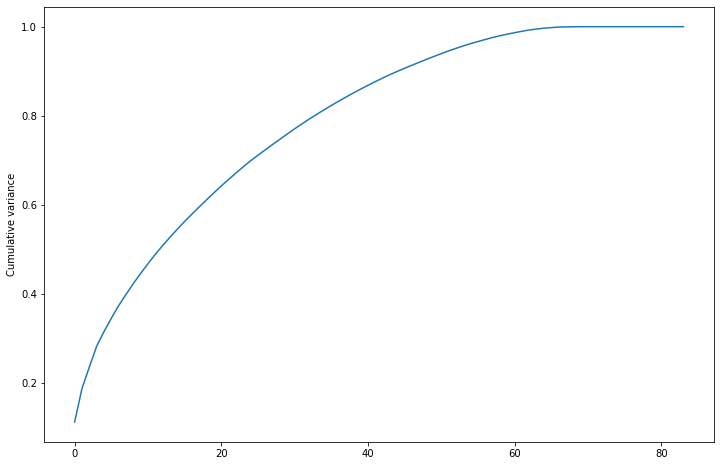

In [529]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.plot(var_cum)
plt.ylabel('Cumulative variance')

In [530]:
#Perform PCA using 55 features

In [531]:
from sklearn.decomposition import IncrementalPCA

In [532]:
inc_pca = IncrementalPCA(n_components=55)
pca_train_df = inc_pca.fit_transform(X_train)
pca_test_df = inc_pca.transform(X_test)
print(pca_train_df.shape, pca_test_df.shape)

(48427, 55) (12107, 55)


In [533]:
cormat = np.corrcoef(pca_train_df.transpose())

### Prediction

#### Logistic Regression

In [534]:
log_reg = LogisticRegression()
log_model = log_reg.fit(pca_train_df, y_train)
y_pred = log_model.predict(pca_test_df)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.8055670273395557
ROC AUC: 0.8035147412716299


In [535]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      5952
           1       0.75      0.93      0.83      6155

    accuracy                           0.81     12107
   macro avg       0.82      0.80      0.80     12107
weighted avg       0.82      0.81      0.80     12107



#### XGBoost Classification

In [536]:
xgb_cl = XGBClassifier()
xgb_model_cl = xgb_cl.fit(pca_train_df, y_train)
y_pred = xgb_model_cl.predict(pca_test_df)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.9162467993722639
ROC AUC: 0.915827049649293


In [537]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      5952
           1       0.90      0.94      0.92      6155

    accuracy                           0.92     12107
   macro avg       0.92      0.92      0.92     12107
weighted avg       0.92      0.92      0.92     12107



### Cross Validation

In [538]:
# params = {
#     'n_estimators':[100,200, 500, 750],
#     'learning_rate':[0.01, 0.02, 0.05, 0.1, 0.25],
#     'min_child_weight':[1,5,7,10],
#     'gamma':[0.1, 0.5, 1, 1.5, 5],
#     'subsample':[0.6,0.8,1.0],
#     'colsample_bytree':[0.6,0.8,1.0],
#     'max_depth':[3,4,5,10,12]
# }

# folds = 5
# param_combo = 100
# random_search = RandomizedSearchCV(estimator=xgb_cl, param_distributions=params, n_jobs=-1, scoring='accuracy', cv=5, verbose=1, n_iter=30)
# random_search.fit(pca_train_df, y_train)

In [539]:
# param_grid = [    
#     {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter' : [100,200,500, 1000]
#     }
# ]
# clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# clf_model = clf.fit(pca_train_df, y_train)

### Predict Solutions

In [542]:
test_data =  pd.read_csv('test.csv')
# columns_70.remove('churn_probability')
test_data = test_data[columns_70]

# Delete Date columns
date_col = []
for col in test_data.columns:
    if 'date' in col:
        date_col.append(col)
test_data.drop(columns=date_col, inplace=True)

#Fill MOU and other outgoing, incoming call null values with 0
test_data.fillna(0, inplace=True)

#find all the month columns
month_col = []
distinct_features = []
for col in test_data.columns:
    if '6' in col or '7' in col or '8' in col:
        month_col.append(col)
        col = col.split('_')[:-1]
        col = '_'.join(col)
        distinct_features.append(col)

# Find the avg and difference for all these columns
for feature in set(distinct_features):
    test_data[feature+'_avg'] = (test_data[feature+'_6'] + test_data[feature+'_7'])/2
    test_data[feature+'_diff'] = test_data[feature+'_avg'] - test_data[feature+'_8']
    test_data.drop(columns=[feature+'_6', feature+'_7', feature+'_8'], inplace=True)

test_data['vbc_3g_avg'] = test_data['jun_vbc_3g'] + test_data['jul_vbc_3g']
test_data['vbc_3g_avg'] = test_data['vbc_3g_avg']/2
test_data['vbc_3g_diff'] = test_data['vbc_3g_avg'] - test_data['aug_vbc_3g']
test_data.drop(columns=['aug_vbc_3g', 'jun_vbc_3g', 'jul_vbc_3g'], inplace=True)

#delete columns with 0 variance
test_data.drop(columns=cols_with_std_0, inplace=True)

# print(test_data.shape)

test_data_bkp = test_data.copy()

# test_data = scaler.transform(test_data)
# test_data = inc_pca.transform(test_data)
# y_result = log_model.predict(test_data)

# y_result = res.predict(sm.add_constant(test_data)).values.reshape(-1)
# y_result = [1 if i>=0.55 else 0 for i in y_result]

y_result = xgbm_model.predict(test_data)

test_data_bkp['churn_probability'] = y_result
test_solution = test_data_bkp.loc[:, ['id', 'churn_probability']]
test_solution.to_csv('test_data_solution.csv', index=False)